In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import datetime
import xgboost as xgb


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

In [2]:
df = pd.read_excel("cars.xlsx") 

df.head()

,Location,Maker,Model,Year,Colour,Amount (Million ₦),Type,Distance_Km
0,Abuja,Mercedes-Benz,GLA 250,2015,Brown,14.50,Foreign Used,50000.0
1,Abuja,Hyundai,Accent,2013,Red,1.55,Nigerian Used,NaN
2,Lagos,Lexus,GX 460 Premium,2011,White,14.00,Foreign Used,85000.0
3,Lagos,Lexus,ES 350,2011,Gray,4.95,Foreign Used,NaN
4,Ibadan,Toyota,Verso 1.6,2009,Silver,1.69,Nigerian Used,118906.0


In [3]:
df.shape

(4487, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4487 entries, 0 to 4486
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Location            4487 non-null   object 
 1   Maker               4487 non-null   object 
 2   Model               4487 non-null   object 
 3   Year                4487 non-null   int64  
 4   Colour              4487 non-null   object 
 5   Amount (Million ₦)  4487 non-null   float64
 6   Type                4487 non-null   object 
 7   Distance_Km         2932 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 280.6+ KB


In [5]:
df.describe(include = 'all')

,Location,Maker,Model,Year,Colour,Amount (Million ₦),Type,Distance_Km
count,4487,4487,4487,4487.000000,4487,4487.000000,4487,2.932000e+03
unique,3,47,897,NaN,19,NaN,3,NaN
top,Abuja,Toyota,Camry,NaN,Black,NaN,Foreign Used,NaN
freq,2083,1807,437,NaN,1276,NaN,3121,NaN
mean,NaN,NaN,NaN,2011.095610,NaN,11.309795,NaN,1.010383e+05
std,NaN,NaN,NaN,4.823362,NaN,20.585915,NaN,1.150914e+05
min,NaN,NaN,NaN,1982.000000,NaN,0.420000,NaN,1.000000e+00
25%,NaN,NaN,NaN,2008.000000,NaN,3.600000,NaN,5.237850e+04
50%,NaN,NaN,NaN,2011.000000,NaN,5.700000,NaN,7.900000e+04
75%,NaN,NaN,NaN,2014.000000,NaN,12.000000,NaN,1.099392e+05


In [6]:
df.columns

Index(['Location', 'Maker', 'Model', 'Year', 'Colour', 'Amount (Million ₦)',
       'Type', 'Distance_Km'],
      dtype='object')

In [7]:
objects = df.select_dtypes(include = 'object')
objects.columns

Index(['Location', 'Maker', 'Model', 'Colour', 'Type'], dtype='object')

In [8]:
for col in objects.columns:
    print(col)
    print(df[col].nunique())
    print(df[col].unique())

Location
3
['Abuja' 'Lagos' 'Ibadan']
Maker
47
['Mercedes-Benz' 'Hyundai' 'Lexus' 'Toyota' 'Mazda' 'Honda' 'Land Rover'
 'Porsche' 'Acura' 'Nissan' 'Pontiac' 'Ford' 'Jeep' 'Kia' 'Peugeot' 'BMW'
 'Mitsubishi' 'Dodge' 'Chevrolet' 'Scion' 'Audi' 'Infiniti' 'Mini'
 'Volkswagen' 'Suzuki' 'Chrysler' 'Volvo' 'Rolls-Royce' 'JAC' 'Subaru'
 'Renault' 'GMC' 'Rover' 'IVM' 'Bentley' 'Opel' 'Lincoln' 'Hummer'
 'Saturn' 'Cadillac' 'Lamborghini' 'Buick' 'Smart' 'Jaguar' 'Ferrari'
 'Tata' 'Skoda']
Model
897
['GLA 250' 'Accent' 'GX 460 Premium' 'ES 350' 'Verso 1.6' 'Corolla 1.8 LE'
 'E350' 'GL-Class' 'RX 350 AWD' 'Land Cruiser 3.5 V6' 'Matrix'
 'Land Cruiser' 'C350' 'Corolla' 'IS 250 4WD' 'Venza V6' 'CX-7' 'RX 350'
 'Highlander Limited 4x4' 'RX' 'RX 350 F Sport AWD' 'Camry'
 'Land Cruiser 5.7 V8 VX-S' 'GLK-Class' 'Avalon' 'GS 300' 'Accord'
 '4-Runner' 'Civic' 'ES 330 Sedan' 'Corolla LE (1.8L 4cyl 2A)' 'Santa Fe'
 'Highlander' 'Elantra' '4-Runner Limited V6' 'Venza Limited FWD V6'
 'M Class ML 350 4Matic

In [9]:
df['Age'] = datetime.date.today().year - df['Year']

In [10]:
df.head()

,Location,Maker,Model,Year,Colour,Amount (Million ₦),Type,Distance_Km,Age
0,Abuja,Mercedes-Benz,GLA 250,2015,Brown,14.50,Foreign Used,50000.0,7
1,Abuja,Hyundai,Accent,2013,Red,1.55,Nigerian Used,NaN,9
2,Lagos,Lexus,GX 460 Premium,2011,White,14.00,Foreign Used,85000.0,11
3,Lagos,Lexus,ES 350,2011,Gray,4.95,Foreign Used,NaN,11
4,Ibadan,Toyota,Verso 1.6,2009,Silver,1.69,Nigerian Used,118906.0,13


In [11]:
df.drop(['Model'], axis = 1, inplace = True)
df.head()

,Location,Maker,Year,Colour,Amount (Million ₦),Type,Distance_Km,Age
0,Abuja,Mercedes-Benz,2015,Brown,14.50,Foreign Used,50000.0,7
1,Abuja,Hyundai,2013,Red,1.55,Nigerian Used,NaN,9
2,Lagos,Lexus,2011,White,14.00,Foreign Used,85000.0,11
3,Lagos,Lexus,2011,Gray,4.95,Foreign Used,NaN,11
4,Ibadan,Toyota,2009,Silver,1.69,Nigerian Used,118906.0,13


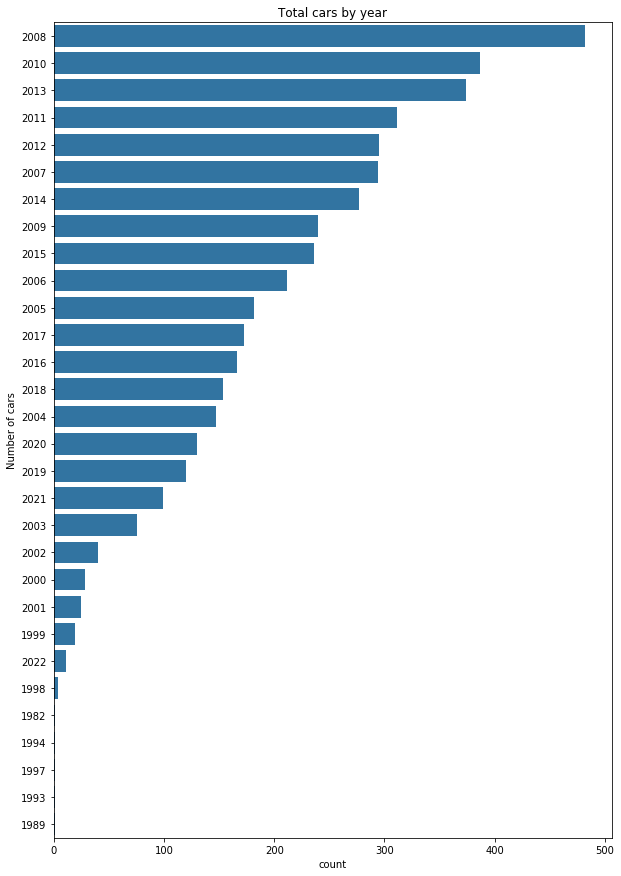

In [12]:
plt.figure(figsize = (10, 15))
color = sns.color_palette()[0]
order = df['Year'].value_counts().index
sns.countplot(y = 'Year', data = df, color = color, order = order)
plt.title('Total cars by year')
plt.ylabel('Number of cars')

plt.show()

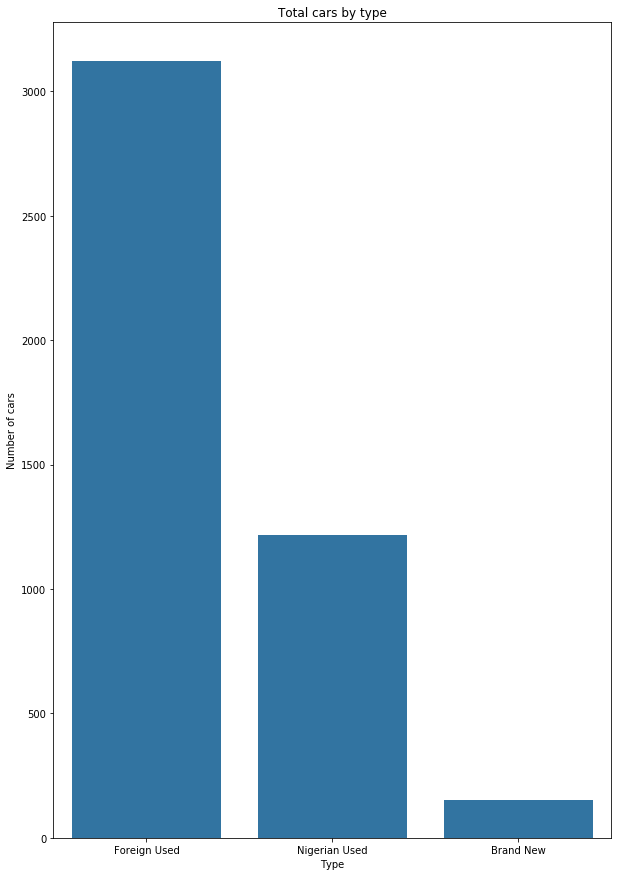

In [13]:
plt.figure(figsize = (10, 15))
order = df['Type'].value_counts().index
sns.countplot(x = 'Type', data = df, color = color, order = order)
plt.title('Total cars by type')
plt.ylabel('Number of cars')

plt.show()

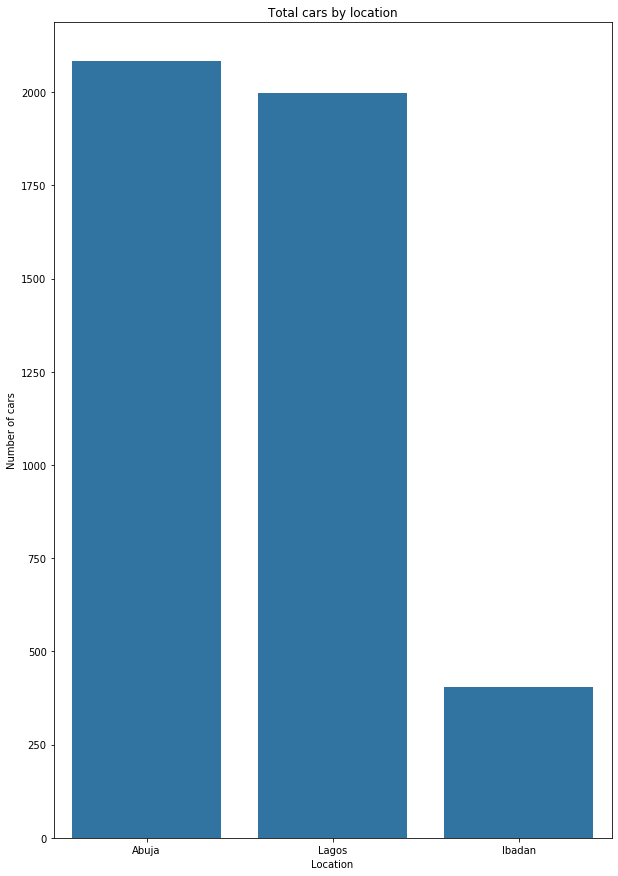

In [14]:
plt.figure(figsize = (10, 15))
order = df['Location'].value_counts().index
sns.countplot(x = 'Location', data = df, color = color, order = order)
plt.title('Total cars by location')
plt.ylabel('Number of cars')

plt.show()

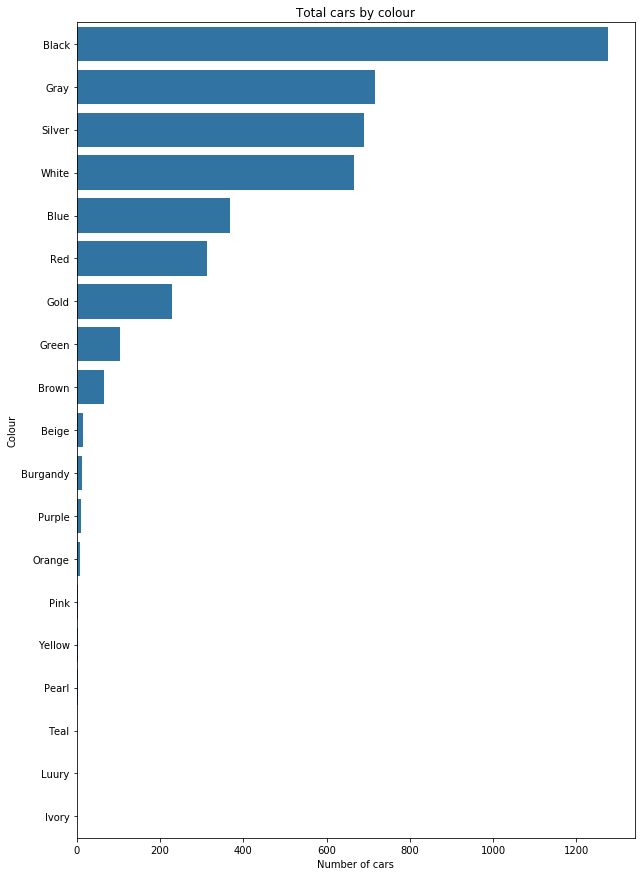

In [15]:
plt.figure(figsize = (10, 15))
order = df['Colour'].value_counts().index
sns.countplot(y = 'Colour', data = df, color = color, order = order)
plt.title('Total cars by colour')
plt.xlabel('Number of cars')

plt.show()

In [16]:
objects = df.select_dtypes(include = 'object')
objects.columns

Index(['Location', 'Maker', 'Colour', 'Type'], dtype='object')

In [17]:
for col in objects:
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col])

df.head()

,Location,Maker,Year,Colour,Amount (Million ₦),Type,Distance_Km,Age
0,0,26,2015,3,14.50,1,50000.0,7
1,0,14,2013,14,1.55,2,NaN,9
2,2,23,2011,17,14.00,1,85000.0,11
3,2,23,2011,6,4.95,1,NaN,11
4,1,44,2009,15,1.69,2,118906.0,13


In [18]:
df.drop(['Year'], axis = 1, inplace = True)
df.head()

,Location,Maker,Colour,Amount (Million ₦),Type,Distance_Km,Age
0,0,26,3,14.50,1,50000.0,7
1,0,14,14,1.55,2,NaN,9
2,2,23,17,14.00,1,85000.0,11
3,2,23,6,4.95,1,NaN,11
4,1,44,15,1.69,2,118906.0,13


In [19]:
df['Distance_Km'].isnull().sum()

1555

Text(0.5, 1.0, 'Distance_Km Distribution')

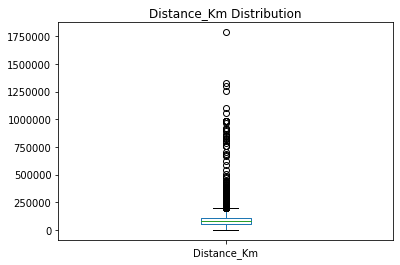

In [20]:
df['Distance_Km'].plot(kind = 'box')
plt.title('Distance_Km Distribution')

# Filling with the mean

In [21]:
df_mean = df.copy()
df_mean.head()

,Location,Maker,Colour,Amount (Million ₦),Type,Distance_Km,Age
0,0,26,3,14.50,1,50000.0,7
1,0,14,14,1.55,2,NaN,9
2,2,23,17,14.00,1,85000.0,11
3,2,23,6,4.95,1,NaN,11
4,1,44,15,1.69,2,118906.0,13


In [22]:
mean_imputer = SimpleImputer(strategy = 'mean')
df_mean['Distance_Km'] = mean_imputer.fit_transform(df_mean['Distance_Km'].values.reshape(-1,1))

In [23]:
df_mean.head()

,Location,Maker,Colour,Amount (Million ₦),Type,Distance_Km,Age
0,0,26,3,14.50,1,50000.000000,7
1,0,14,14,1.55,2,101038.321282,9
2,2,23,17,14.00,1,85000.000000,11
3,2,23,6,4.95,1,101038.321282,11
4,1,44,15,1.69,2,118906.000000,13


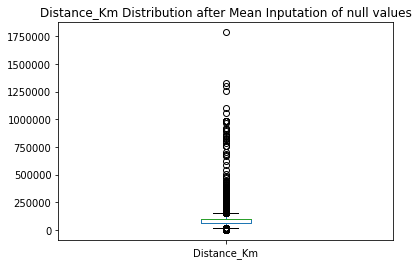

In [24]:
df_mean['Distance_Km'].plot(kind = 'box')
plt.title('Distance_Km Distribution after Mean Inputation of null values');

# Filling with the median

In [25]:
df_median = df.copy()
df_median.head()

,Location,Maker,Colour,Amount (Million ₦),Type,Distance_Km,Age
0,0,26,3,14.50,1,50000.0,7
1,0,14,14,1.55,2,NaN,9
2,2,23,17,14.00,1,85000.0,11
3,2,23,6,4.95,1,NaN,11
4,1,44,15,1.69,2,118906.0,13


In [26]:
median_imputer = SimpleImputer(strategy = 'median')
df_median['Distance_Km'] = median_imputer.fit_transform(df_median['Distance_Km'].values.reshape(-1,1))

In [27]:
df_median.head()

,Location,Maker,Colour,Amount (Million ₦),Type,Distance_Km,Age
0,0,26,3,14.50,1,50000.0,7
1,0,14,14,1.55,2,79000.0,9
2,2,23,17,14.00,1,85000.0,11
3,2,23,6,4.95,1,79000.0,11
4,1,44,15,1.69,2,118906.0,13


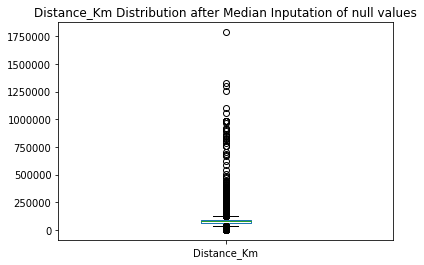

In [28]:
df_median['Distance_Km'].plot(kind = 'box')
plt.title('Distance_Km Distribution after Median Inputation of null values');

# Filling with KNN imputer

In [29]:
df_knn = df.copy()
df_knn.head()

,Location,Maker,Colour,Amount (Million ₦),Type,Distance_Km,Age
0,0,26,3,14.50,1,50000.0,7
1,0,14,14,1.55,2,NaN,9
2,2,23,17,14.00,1,85000.0,11
3,2,23,6,4.95,1,NaN,11
4,1,44,15,1.69,2,118906.0,13


In [30]:
knn_imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
df_knn['Distance_Km'] = pd.DataFrame(knn_imputer.fit_transform(df_knn['Distance_Km'].values.reshape(-1, 1)))
df_knn.head()

,Location,Maker,Colour,Amount (Million ₦),Type,Distance_Km,Age
0,0,26,3,14.50,1,50000.000000,7
1,0,14,14,1.55,2,101038.321282,9
2,2,23,17,14.00,1,85000.000000,11
3,2,23,6,4.95,1,101038.321282,11
4,1,44,15,1.69,2,118906.000000,13


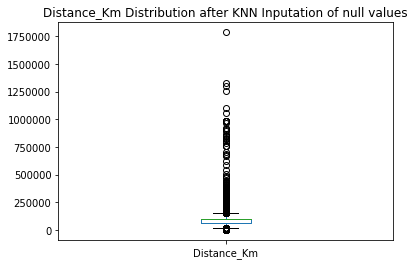

In [31]:
df_knn['Distance_Km'].plot(kind = 'box')
plt.title('Distance_Km Distribution after KNN Inputation of null values');

# Building models for each form of imputing

## Mean Imputation Model

In [32]:
#Splitting dataset into train and test
X = np.array(df_mean.drop(['Amount (Million ₦)'], 1))
y = np.array(df_mean['Amount (Million ₦)'])

In [33]:
print(len(X), len(y))

4487 4487


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [35]:
lr = LinearRegression()
lr.fit(X_train, y_train)
mean_acc_lr = lr.score(X_test, y_test)
print(mean_acc_lr)

0.3609580119757688


In [36]:
#making predictions and checking error
y_pred = lr.predict(X_test)
mean_mse_lr = mean_squared_error(y_test, y_pred)
mean_mae_lr = mean_absolute_error(y_test, y_pred)
print('Mean squared error is {}'.format(mean_mse_lr))
print('Mean absolute error is {}'.format(mean_mae_lr))

Mean squared error is 182.88087411610323
Mean absolute error is 7.547656179423793


In [37]:
xgr = XGBRegressor()
xgr.fit(X_train, y_train)
mean_acc_xgr = xgr.score(X_test, y_test)
print(mean_acc_xgr)

[22:28:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.5501628202747051


In [38]:
#making predictions and checking error
y_pred = xgr.predict(X_test)
mean_mse_xgr = mean_squared_error(y_test, y_pred)
mean_mae_xgr = mean_absolute_error(y_test, y_pred)
print('Mean squared error is {}'.format(mean_mse_xgr))
print('Mean absolute error is {}'.format(mean_mae_xgr))

Mean squared error is 128.7342900463141
Mean absolute error is 4.347052286284595


## Median Imputation Model

In [39]:
#Splitting dataset into train and test
X = np.array(df_median.drop(['Amount (Million ₦)'], 1))
y = np.array(df_median['Amount (Million ₦)'])

In [40]:
print(len(X), len(y))

4487 4487


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [42]:
lr = LinearRegression()
lr.fit(X_train, y_train)
median_acc_lr = lr.score(X_test, y_test)
print(median_acc_lr)

0.3580647397200204


In [43]:
#making predictions and checking error
y_pred = lr.predict(X_test)
median_mse_lr = mean_squared_error(y_test, y_pred)
median_mae_lr = mean_absolute_error(y_test, y_pred)
print('Mean squared error is {}'.format(median_mse_lr))
print('Mean absolute error is {}'.format(median_mae_lr))

Mean squared error is 172.52178824037125
Mean absolute error is 7.749936131637013


In [44]:
xgr = XGBRegressor()
xgr.fit(X_train, y_train)
median_acc_xgr = xgr.score(X_test, y_test)
print(median_acc_xgr)

[22:28:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.6162027546545881


In [45]:
#making predictions and checking error
y_pred = xgr.predict(X_test)
median_mse_xgr = mean_squared_error(y_test, y_pred)
median_mae_xgr = mean_absolute_error(y_test, y_pred)
print('Mean squared error is {}'.format(median_mse_xgr))
print('Mean absolute error is {}'.format(median_mae_xgr))

Mean squared error is 103.14651832622503
Mean absolute error is 4.032382498495806


## KNN Imputation Model

In [46]:
#Splitting dataset into train and test
X = np.array(df_knn.drop(['Amount (Million ₦)'], 1))
y = np.array(df_knn['Amount (Million ₦)'])

In [47]:
print(len(X), len(y))

4487 4487


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [49]:
lr = LinearRegression()
lr.fit(X_train, y_train)
knn_acc_lr = lr.score(X_test, y_test)
print(knn_acc_lr)

0.3246394738011903


In [50]:
#making predictions and checking error
y_pred = lr.predict(X_test)
knn_mse_lr = mean_squared_error(y_test, y_pred)
knn_mae_lr = mean_absolute_error(y_test, y_pred)
print('Mean squared error is {}'.format(knn_mse_lr))
print('Mean absolute error is {}'.format(knn_mae_lr))

Mean squared error is 229.02181752446623
Mean absolute error is 7.958807677576884


In [51]:
xgr = XGBRegressor()
xgr.fit(X_train, y_train)
knn_acc_xgr = xgr.score(X_test, y_test)
print(knn_acc_xgr)

[22:28:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.6564214471432985


In [52]:
#making predictions and checking error
y_pred = xgr.predict(X_test)
knn_mse_xgr = mean_squared_error(y_test, y_pred)
knn_mae_xgr = mean_absolute_error(y_test, y_pred)
print('Mean squared error is {}'.format(knn_mse_xgr))
print('Mean absolute error is {}'.format(knn_mae_xgr))

Mean squared error is 116.51108050473198
Mean absolute error is 4.308601792036248


# Collating Results

In [53]:
#Putting Results in a Dataframe.
mean = pd.Series({'Input_Method': 'Mean', 
                        'Acc_lr': mean_acc_lr, 
                        'MSE_lr': mean_mse_lr, 
                        'MAE_lr': mean_mae_lr, 
                        'Acc_xgr': mean_acc_xgr, 
                        'MSE_xgr': mean_mse_xgr, 
                        'MAE_xgr': mean_mae_xgr,})

median = pd.Series({'Input_Method': 'Median', 
                        'Acc_lr': median_acc_lr, 
                        'MSE_lr': median_mse_lr, 
                        'MAE_lr': median_mae_lr, 
                        'Acc_xgr': median_acc_xgr, 
                        'MSE_xgr': median_mse_xgr, 
                        'MAE_xgr': median_mae_xgr,})

knn = pd.Series({'Input_Method': 'KNN', 
                        'Acc_lr': knn_acc_lr, 
                        'MSE_lr': knn_mse_lr, 
                        'MAE_lr': knn_mae_lr, 
                        'Acc_xgr': knn_acc_xgr, 
                        'MSE_xgr': knn_mse_xgr, 
                        'MAE_xgr': knn_mae_xgr,})
result_df = pd.DataFrame([mean, median, knn])
result_df.head()

,Input_Method,Acc_lr,MSE_lr,MAE_lr,Acc_xgr,MSE_xgr,MAE_xgr
0,Mean,0.360958,182.880874,7.547656,0.550163,128.734290,4.347052
1,Median,0.358065,172.521788,7.749936,0.616203,103.146518,4.032382
2,KNN,0.324639,229.021818,7.958808,0.656421,116.511081,4.308602


- Accuracy Score: For LinearRegression, all Imputation Methods have very low accuracy score(some hyperparameter tuning and more data preprocessing can take care of this) with the Mean Input method having the best accuracy score followed by Median and then KNN. For XGBRegressor, the KNN Input method has the best accuracy score followed by Median and then Mean.

- Mean Squared Error: For LinearRegression, the Median input method has the best MSE followed by Mean and then KNN. For XGBRegressor, the Median input method again has the best MSE followed by KNN and then Mean.

- Mean Absolute Error: For LinearRegression, the Mean input method has the best MAE followed by Median and then KNN. For XGBRegressor, the Median input method has the best MAE followed by KNN and then Mean.